In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
print(os.getcwd())


./data/产品物料预测说明.docx
./data/demand_train.csv
./data/提交结果模板.csv
./data/stock_train.csv
/Users/sampson/Workspace/mse1-2/material-predict


In [2]:
df_demand = pd.read_csv('./data/demand_train.csv',  encoding="gbk")
df_stock = pd.read_csv('./data/stock_train.csv',  encoding="gbk")

In [3]:
df_demand['过账日期'] = pd.to_datetime(df_demand['过账日期'])

df_demand.head(10)

,过账日期,需求量,工厂编码,物料编码,物料品牌,物料类型,物料品类
0,2018-01-06,0.33,2004,1000,5000,3002,4014
1,2018-01-08,0.09,2010,1000,5000,3002,4014
2,2018-01-09,0.09,2008,1000,5000,3002,4014
3,2018-01-10,0.10,2010,1000,5000,3002,4014
4,2018-01-11,0.17,2004,1000,5000,3002,4014
5,2018-01-13,0.06,2008,1000,5000,3002,4014
6,2018-01-15,0.45,2004,1000,5000,3002,4014
7,2018-01-18,0.03,2010,1000,5000,3002,4014
8,2018-01-19,0.06,2008,1000,5000,3002,4014
9,2018-01-20,0.84,2004,1000,5000,3002,4014


In [4]:
df_stock['过账日期'] = pd.to_datetime(df_stock['过账日期'])

df_stock.head(10)

,过账日期,工厂编码,物料编码,物料品牌,物料类型,物料品类,库存量
0,2018-01-24,2000,1001,5000,3002,4006,2.71
1,2018-01-24,2000,1003,5000,3002,4005,6.84
2,2018-01-24,2000,1014,5000,3002,4008,1.28
3,2018-01-24,2000,1021,5000,3002,4006,1.04
4,2018-01-24,2000,1027,5001,3002,4014,2.63
5,2018-01-24,2000,1029,5001,3002,4006,22.20
6,2018-01-24,2000,1031,5001,3002,4010,243.24
7,2018-01-24,2000,1034,5001,3002,4009,34.07
8,2018-01-24,2000,1037,5001,3002,4002,61.70
9,2018-01-24,2000,1038,5001,3002,4006,36.06


In [5]:
# 分析物料编码能否确定唯一工厂编码
df_group_test = df_demand.groupby(['物料编码'])['工厂编码'].nunique().reset_index()
df_group_test.describe()

,物料编码,工厂编码
count,294.000000,294.000000
mean,1148.676871,3.272109
std,86.036350,3.590959
min,1000.000000,1.000000
25%,1075.250000,1.000000
50%,1149.500000,2.000000
75%,1222.750000,4.000000
max,1297.000000,16.000000


In [6]:
# 分析物料编码能否确定唯一物料品类
df_group_test = df_demand.groupby(['物料编码'])['物料品类'].nunique().reset_index()
df_group_test.describe()

,物料编码,物料品类
count,294.000000,294.0
mean,1148.676871,1.0
std,86.036350,0.0
min,1000.000000,1.0
25%,1075.250000,1.0
50%,1149.500000,1.0
75%,1222.750000,1.0
max,1297.000000,1.0


In [7]:
# 分析物料编码能否确定唯一物料品牌
df_group_test = df_demand.groupby(['物料编码'])['物料品牌'].nunique().reset_index()
df_group_test.describe()

,物料编码,物料品牌
count,294.000000,294.0
mean,1148.676871,1.0
std,86.036350,0.0
min,1000.000000,1.0
25%,1075.250000,1.0
50%,1149.500000,1.0
75%,1222.750000,1.0
max,1297.000000,1.0


In [8]:
# 分析物料编码能否确定唯一物料类型
df_group_test = df_demand.groupby(['物料编码'])['物料类型'].nunique().reset_index()
df_group_test.describe()

,物料编码,物料类型
count,294.000000,294.0
mean,1148.676871,1.0
std,86.036350,0.0
min,1000.000000,1.0
25%,1075.250000,1.0
50%,1149.500000,1.0
75%,1222.750000,1.0
max,1297.000000,1.0


In [9]:
df_demand.describe()

,过账日期,需求量,工厂编码,物料编码,物料品牌,物料类型,物料品类
count,1183595,1.183595e+06,1.183595e+06,1.183595e+06,1.183595e+06,1.183595e+06,1.183595e+06
mean,2019-07-18 09:37:17.450817792,1.958798e+00,2.006381e+03,1.072562e+03,5.002936e+03,3.002101e+03,4.009243e+03
min,2018-01-01 00:00:00,0.000000e+00,2.000000e+03,1.000000e+03,5.000000e+03,3.000000e+03,4.000000e+03
25%,2018-10-17 00:00:00,2.800000e-01,2.002000e+03,1.038000e+03,5.001000e+03,3.002000e+03,4.006000e+03
50%,2019-06-27 00:00:00,8.300000e-01,2.006000e+03,1.053000e+03,5.001000e+03,3.002000e+03,4.010000e+03
75%,2020-05-11 00:00:00,2.010000e+00,2.011000e+03,1.091000e+03,5.001000e+03,3.002000e+03,4.013000e+03
max,2020-11-24 00:00:00,8.868000e+01,2.015000e+03,1.297000e+03,5.012000e+03,3.004000e+03,4.023000e+03
std,NaN,3.016734e+00,4.934734e+00,5.195837e+01,3.641080e+00,5.131062e-01,5.127511e+00


In [10]:
df_stock.describe()

,过账日期,工厂编码,物料编码,物料品牌,物料类型,物料品类,库存量
count,14931,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000
mean,2019-07-25 04:22:25.388788480,2006.470832,1084.777443,5002.862568,3002.034425,4010.774697,34.927600
min,2018-01-24 00:00:00,2000.000000,1000.000000,5000.000000,3000.000000,4000.000000,0.000000
25%,2018-12-24 00:00:00,2002.000000,1037.000000,5001.000000,3002.000000,4006.000000,2.010000
50%,2019-07-24 00:00:00,2006.000000,1053.000000,5001.000000,3002.000000,4010.000000,8.670000
75%,2020-03-24 00:00:00,2011.000000,1125.000000,5002.000000,3002.000000,4014.000000,30.080000
max,2020-11-24 00:00:00,2015.000000,1297.000000,5012.000000,3004.000000,4023.000000,1270.690000
std,NaN,4.608461,69.556936,3.626574,0.808209,5.962419,84.648045


In [11]:
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183595 entries, 0 to 1183594
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   过账日期    1183595 non-null  datetime64[ns]
 1   需求量     1183595 non-null  float64       
 2   工厂编码    1183595 non-null  int64         
 3   物料编码    1183595 non-null  int64         
 4   物料品牌    1183595 non-null  int64         
 5   物料类型    1183595 non-null  int64         
 6   物料品类    1183595 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 63.2 MB


In [12]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14931 entries, 0 to 14930
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   过账日期    14931 non-null  datetime64[ns]
 1   工厂编码    14931 non-null  int64         
 2   物料编码    14931 non-null  int64         
 3   物料品牌    14931 non-null  int64         
 4   物料类型    14931 non-null  int64         
 5   物料品类    14931 non-null  int64         
 6   库存量     14931 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 816.7 KB


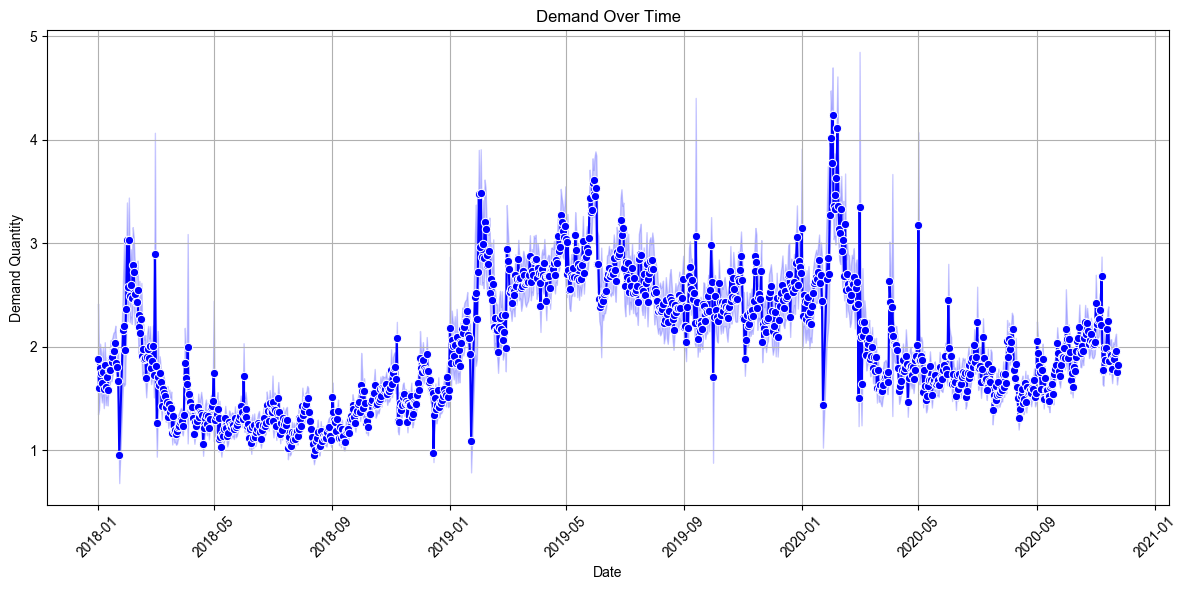

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['SimHei']  # For Windows
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # For Mac
plt.rcParams['axes.unicode_minus'] = False  # This is to display minus signs correctly


df_demand_sorted = df_demand.sort_values('过账日期')

plt.figure(figsize=(12, 6))
sns.lineplot(x='过账日期', y='需求量', data=df_demand_sorted, marker='o', color='b')
plt.title('Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [14]:
df_filtered = df_demand[['需求量', '工厂编码']]
df_grouped = df_filtered.groupby('工厂编码').sum().reset_index()
df_grouped.describe()

,工厂编码,需求量
count,16.000000,16.000000
mean,2007.500000,144901.462250
std,4.760952,110198.937353
min,2000.000000,67712.860000
25%,2003.750000,82183.057500
50%,2007.500000,102795.092500
75%,2011.250000,129455.336500
max,2015.000000,457073.970000


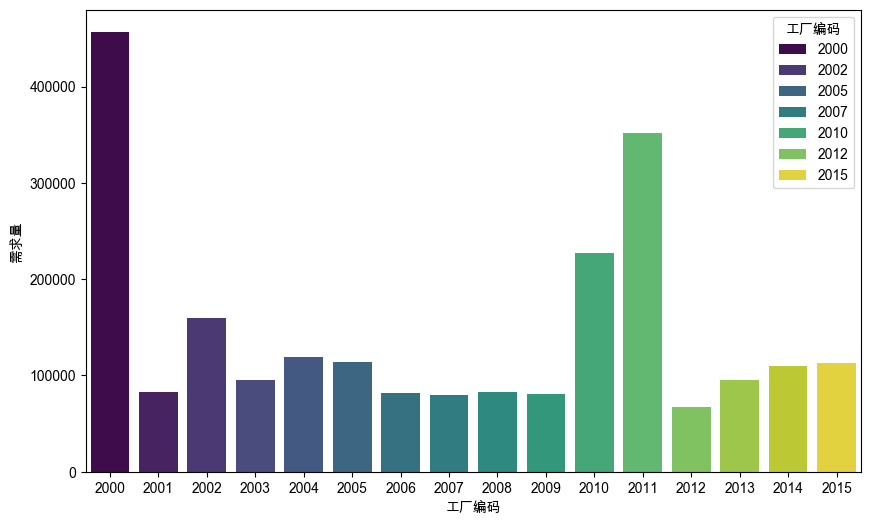

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='工厂编码', y='需求量', palette='viridis', hue='工厂编码')
plt.xlabel('工厂编码')
plt.ylabel('需求量')
plt.show()

In [16]:
df_filtered = df_demand[['需求量', '物料编码']]
df_grouped = df_filtered.groupby('物料编码').sum().reset_index()
df_grouped.describe()
# plt.figure(figsize=(10, 6))
# sns.barplot(data=df_grouped, x='物料编码', y='需求量', palette='viridis')
# plt.title('Total Demand by Factory Code')
# plt.xlabel('Material Code')
# plt.ylabel('Total Demand')
# plt.show()

,物料编码,需求量
count,294.000000,294.000000
mean,1148.676871,7885.793864
std,86.036350,41204.728355
min,1000.000000,0.200000
25%,1075.250000,79.635000
50%,1149.500000,493.195000
75%,1222.750000,2486.767500
max,1297.000000,624660.540000


In [17]:
df_filtered = df_demand[['需求量', '物料类型']]
df_grouped = df_filtered.groupby('物料类型').sum().reset_index()
df_grouped.describe()

,物料类型,需求量
count,5.000000,5.000000e+00
mean,3002.000000,4.636847e+05
std,1.581139,7.007114e+05
min,3000.000000,2.877380e+03
25%,3001.000000,4.074199e+04
50%,3002.000000,6.995165e+04
75%,3003.000000,5.539033e+05
max,3004.000000,1.650949e+06


/var/folders/v5/g47_227965503jwr64326bnw0000gn/T/ipykernel_72248/561124681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='物料类型', y='需求量', palette='viridis')


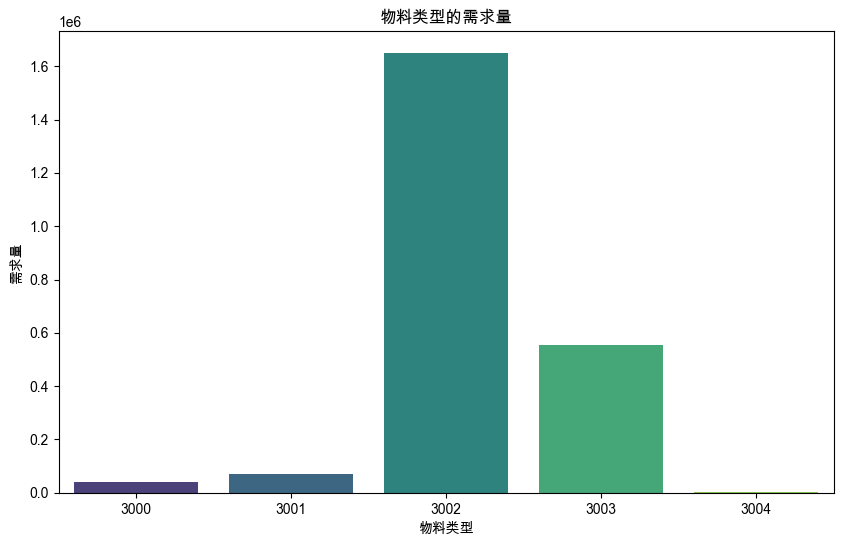

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='物料类型', y='需求量', palette='viridis')
plt.title('物料类型的需求量')
plt.xlabel('物料类型')
plt.ylabel('需求量')
plt.show()

In [19]:
df_demand['年月'] = df_demand['过账日期'].dt.to_period('M').astype(str)
df_demand['月'] = df_demand['年月'].str[-2:]
df_demand['季度'] = df_demand['过账日期'].dt.quarter
df_demand.head()

,过账日期,需求量,工厂编码,物料编码,物料品牌,物料类型,物料品类,年月,月,季度
0,2018-01-06,0.33,2004,1000,5000,3002,4014,2018-01,01,1
1,2018-01-08,0.09,2010,1000,5000,3002,4014,2018-01,01,1
2,2018-01-09,0.09,2008,1000,5000,3002,4014,2018-01,01,1
3,2018-01-10,0.10,2010,1000,5000,3002,4014,2018-01,01,1
4,2018-01-11,0.17,2004,1000,5000,3002,4014,2018-01,01,1


In [20]:
df_stock['年月'] = df_stock['过账日期'].dt.to_period('M').astype(str)
df_stock['月'] = df_stock['年月'].str[-2:]
df_stock['季度'] = df_stock['过账日期'].dt.quarter
df_stock.head()

,过账日期,工厂编码,物料编码,物料品牌,物料类型,物料品类,库存量,年月,月,季度
0,2018-01-24,2000,1001,5000,3002,4006,2.71,2018-01,01,1
1,2018-01-24,2000,1003,5000,3002,4005,6.84,2018-01,01,1
2,2018-01-24,2000,1014,5000,3002,4008,1.28,2018-01,01,1
3,2018-01-24,2000,1021,5000,3002,4006,1.04,2018-01,01,1
4,2018-01-24,2000,1027,5001,3002,4014,2.63,2018-01,01,1


In [21]:
df_demand2 = df_demand.drop(['过账日期', '物料品牌', '物料类型', '物料品类'], axis=1)
df_demand2.head()

,需求量,工厂编码,物料编码,年月,月,季度
0,0.33,2004,1000,2018-01,01,1
1,0.09,2010,1000,2018-01,01,1
2,0.09,2008,1000,2018-01,01,1
3,0.10,2010,1000,2018-01,01,1
4,0.17,2004,1000,2018-01,01,1


In [22]:
df_stock2 = df_stock.drop(['过账日期', '物料品牌', '物料类型', '物料品类'], axis=1)
df_stock2.head()

,工厂编码,物料编码,库存量,年月,月,季度
0,2000,1001,2.71,2018-01,01,1
1,2000,1003,6.84,2018-01,01,1
2,2000,1014,1.28,2018-01,01,1
3,2000,1021,1.04,2018-01,01,1
4,2000,1027,2.63,2018-01,01,1


In [23]:
df_grouped = df_demand.groupby(['年月', '工厂编码', '物料编码'])['需求量'].sum().reset_index()
df_grouped.head()

,年月,工厂编码,物料编码,需求量
0,2018-01,2000,1001,12.53
1,2018-01,2000,1003,32.01
2,2018-01,2000,1014,5.78
3,2018-01,2000,1021,3.96
4,2018-01,2000,1027,12.07


In [24]:
df_merged = pd.merge(df_demand2, df_stock2, on=['年月', '月', '季度', '工厂编码', '物料编码'])
df_merged.head()

,需求量,工厂编码,物料编码,年月,月,季度,库存量
0,0.33,2004,1000,2018-01,01,1,0.38
1,0.09,2010,1000,2018-01,01,1,0.05
2,0.09,2008,1000,2018-01,01,1,0.08
3,0.10,2010,1000,2018-01,01,1,0.05
4,0.17,2004,1000,2018-01,01,1,0.38


In [25]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183595 entries, 0 to 1183594
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   需求量     1183595 non-null  float64
 1   工厂编码    1183595 non-null  int64  
 2   物料编码    1183595 non-null  int64  
 3   年月      1183595 non-null  object 
 4   月       1183595 non-null  object 
 5   季度      1183595 non-null  int32  
 6   库存量     1183595 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 58.7+ MB


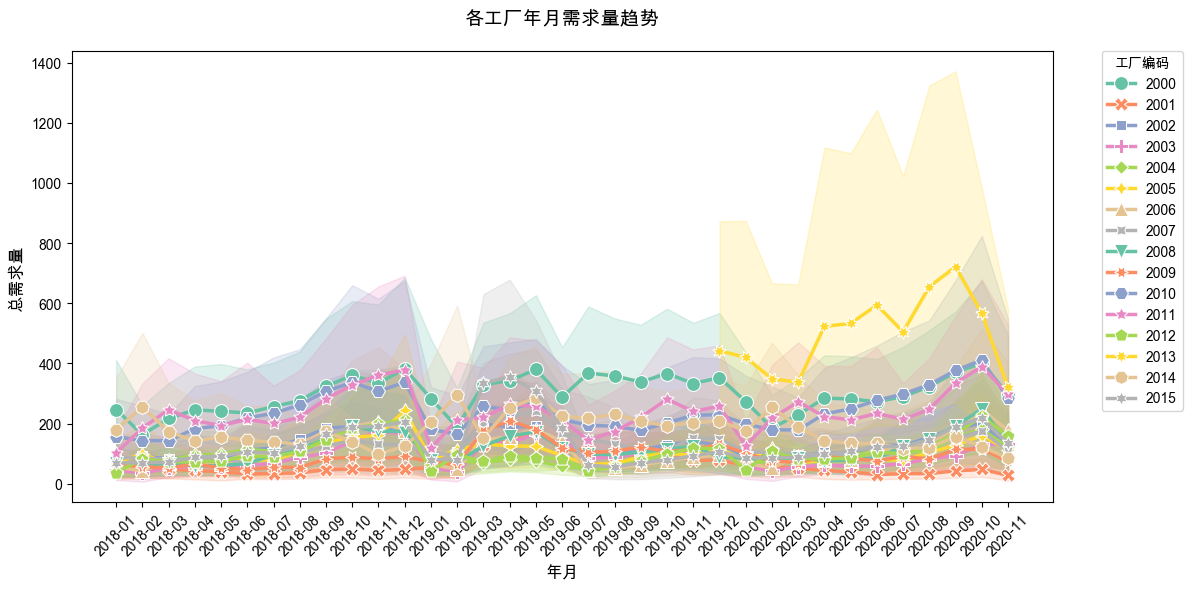

In [26]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_grouped,
    x='年月',
    y='需求量',
    hue='工厂编码',
    style='工厂编码',
    markers=True,
    dashes=False,
    palette='Set2',  # 配色方案
    linewidth=2.5,
    markersize=10
)

plt.title('各工厂年月需求量趋势', fontsize=14, pad=20)
plt.xlabel('年月', fontsize=12)
plt.ylabel('总需求量', fontsize=12)
plt.xticks(rotation=45)

plt.legend(
    title='工厂编码',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# 调整布局
plt.tight_layout()
plt.show()

In [27]:
df_grouped = df_demand.groupby(['月', '工厂编码', '物料编码'])['需求量'].sum().reset_index()
df_grouped.head()

,月,工厂编码,物料编码,需求量
0,01,2000,1001,42.46
1,01,2000,1003,110.61
2,01,2000,1014,20.31
3,01,2000,1021,13.51
4,01,2000,1027,41.34


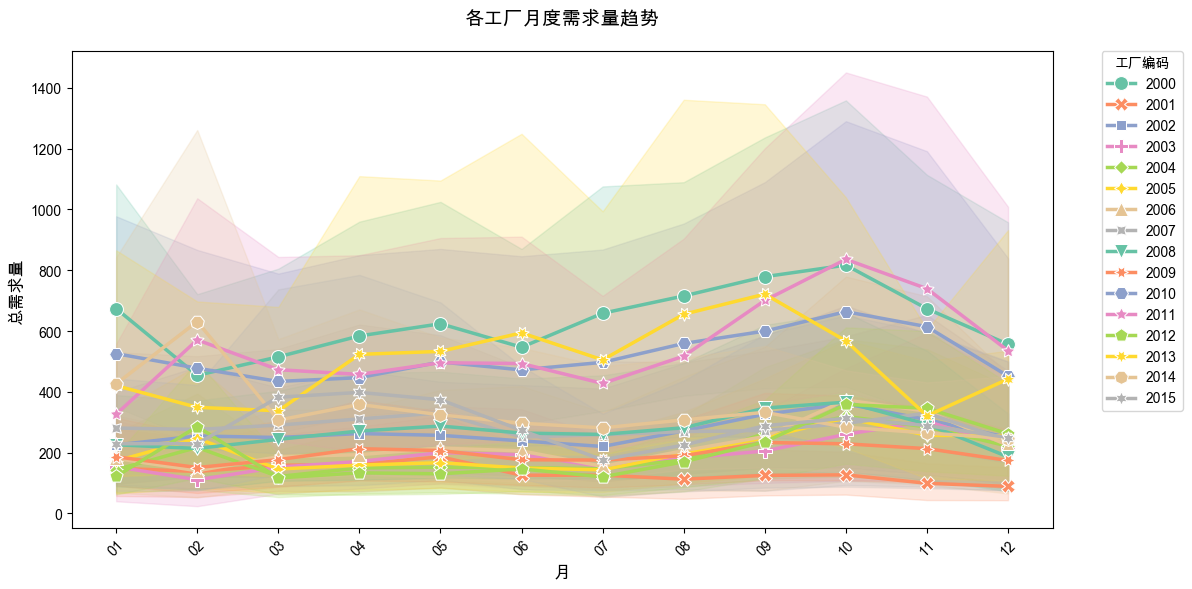

In [28]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_grouped,
    x='月',
    y='需求量',
    hue='工厂编码',
    style='工厂编码',
    markers=True,
    dashes=False,
    palette='Set2',  # 配色方案
    linewidth=2.5,
    markersize=10
)

plt.title('各工厂月度需求量趋势', fontsize=14, pad=20)
plt.xlabel('月', fontsize=12)
plt.ylabel('总需求量', fontsize=12)
plt.xticks(rotation=45)

plt.legend(
    title='工厂编码',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# 调整布局
plt.tight_layout()
plt.show()

In [29]:
df_grouped = df_demand.groupby(['季度', '工厂编码', '物料编码'])['需求量'].sum().reset_index()
df_grouped.head()

,季度,工厂编码,物料编码,需求量
0,1,2000,1001,118.35
1,1,2000,1003,525.26
2,1,2000,1006,73.32
3,1,2000,1010,17.88
4,1,2000,1014,65.94


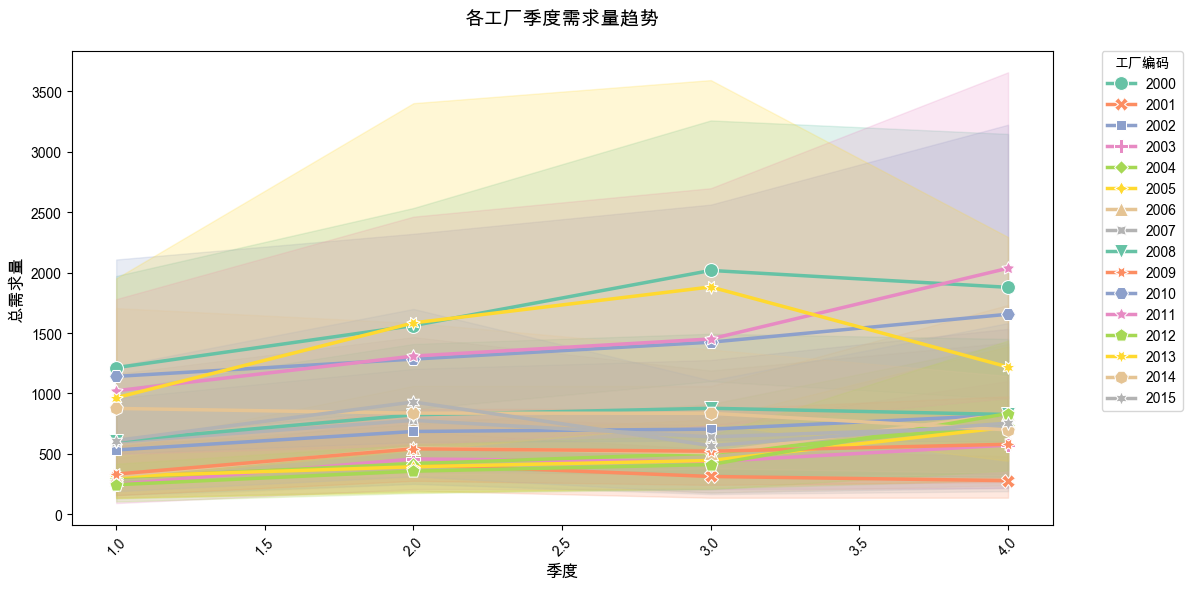

In [30]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_grouped,
    x='季度',
    y='需求量',
    hue='工厂编码',
    style='工厂编码',
    markers=True,
    dashes=False,
    palette='Set2',  # 配色方案
    linewidth=2.5,
    markersize=10
)

plt.title('各工厂季度需求量趋势', fontsize=14, pad=20)
plt.xlabel('季度', fontsize=12)
plt.ylabel('总需求量', fontsize=12)
plt.xticks(rotation=45)

plt.legend(
    title='工厂编码',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# 调整布局
plt.tight_layout()
plt.show()

In [31]:
numeric_cols = ['需求量', '工厂编码', '物料编码', '月', '季度', '库存量']
df_numeric = df_merged[numeric_cols]
correlation_matrix = df_numeric.corr()
df_numeric.head()


,需求量,工厂编码,物料编码,月,季度,库存量
0,0.33,2004,1000,01,1,0.38
1,0.09,2010,1000,01,1,0.05
2,0.09,2008,1000,01,1,0.08
3,0.10,2010,1000,01,1,0.05
4,0.17,2004,1000,01,1,0.38


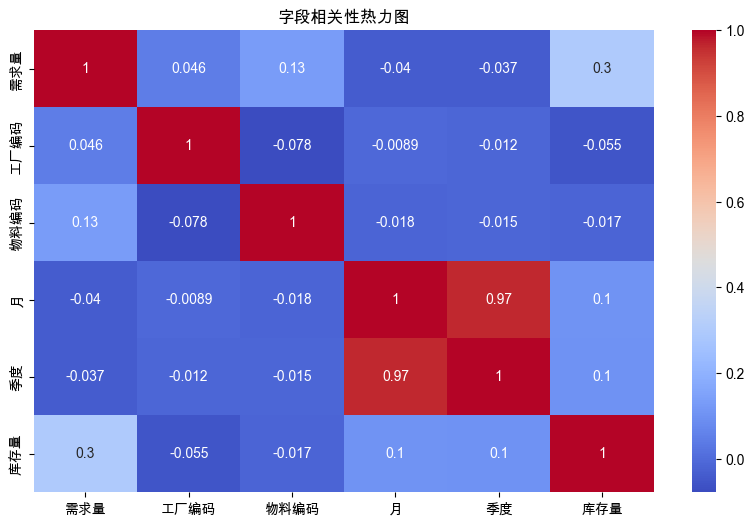

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('字段相关性热力图')
plt.show()

In [33]:
# 经分析 需求量与库存量、物料编码、工厂编码有很大可能存在关联性，考虑到最终预测是通过工厂编码 + 物料编码 进行预测的，故这里将数据进行预处理

df_merged['工厂编码_物料编码'] = df_merged['工厂编码'].astype(str) + '_' + df_merged['物料编码'].astype(str)
df_merged['年'] = df_merged['年月'].str[:4]
df_final = df_merged.groupby(['工厂编码_物料编码', '年月', '年', '月', '季度']).agg({'需求量': 'sum' }).reset_index()
df_final['年'] = df_final['年'].astype(int)
df_final['月'] = df_final['月'].astype(int)
df_final['季度'] = df_final['季度'].astype(int)
df_final.head()

,工厂编码_物料编码,年月,年,月,季度,需求量
0,2000_1001,2018-01,2018,1,1,12.53
1,2000_1001,2018-02,2018,2,1,16.08
2,2000_1001,2018-03,2018,3,1,4.71
3,2000_1001,2018-04,2018,4,2,17.69
4,2000_1001,2018-05,2018,5,2,7.97


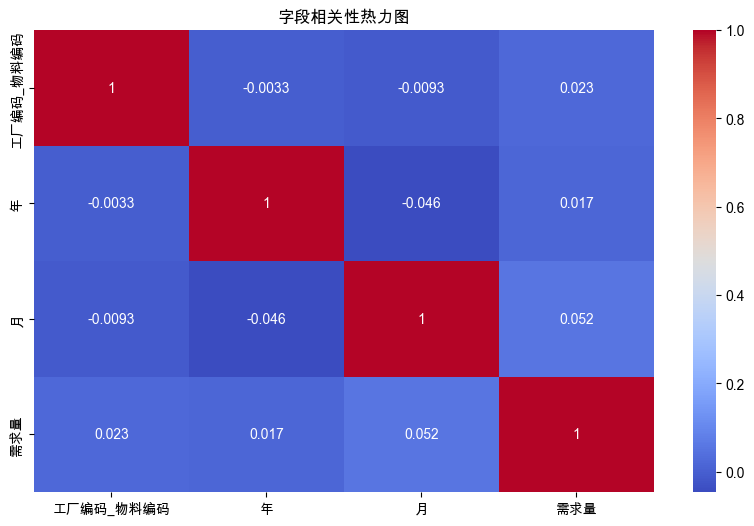

In [34]:
df_numeric = df_final[['工厂编码_物料编码', '年', '月', '需求量']]
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('字段相关性热力图')
plt.show()

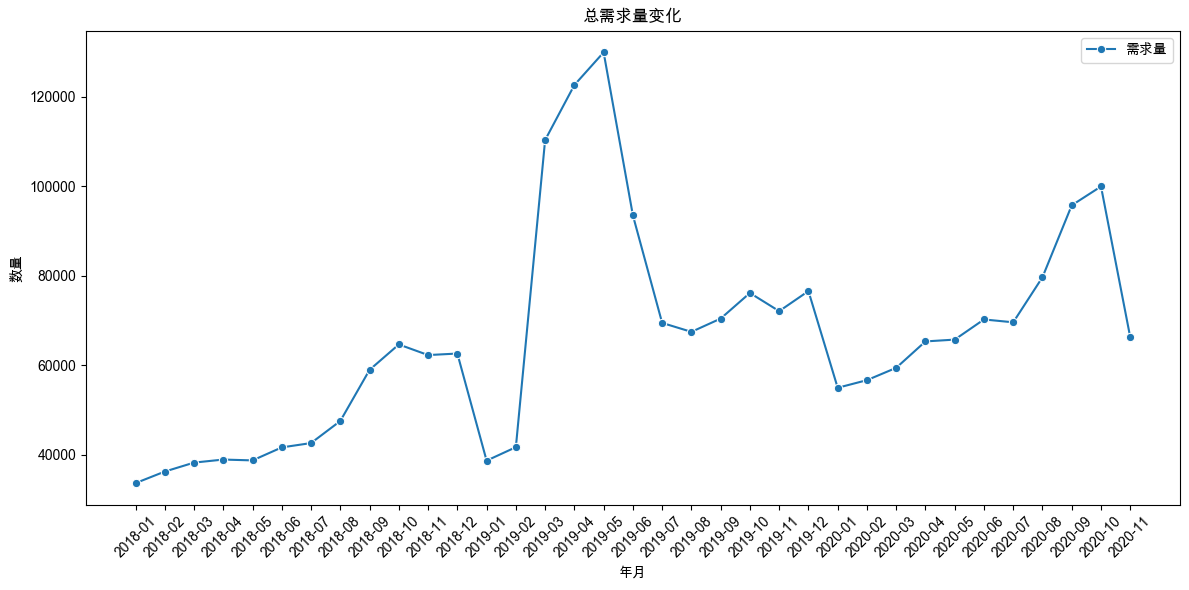

In [35]:
df_plot_by_date = df_final.groupby('年月').agg({'需求量': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_plot_by_date, x='年月', y='需求量', label='需求量', marker='o')

plt.title('总需求量变化')
plt.xlabel('年月')
plt.ylabel('数量')
plt.xticks(rotation=45) 

plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

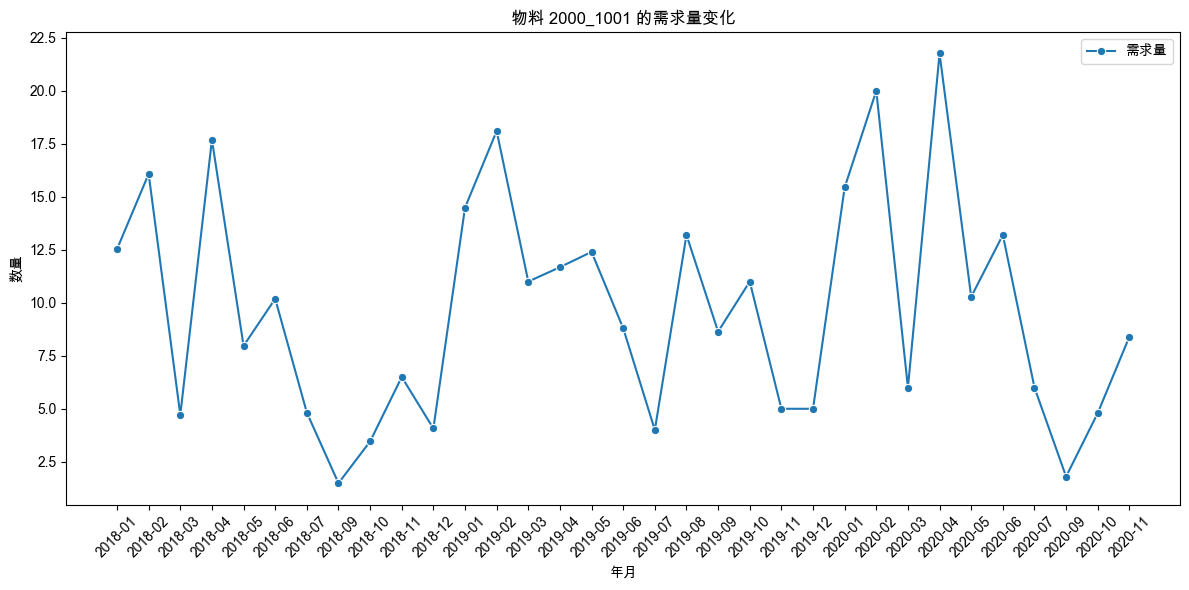

In [36]:
specific_code = '2000_1001'
df_filtered = df_final[df_final['工厂编码_物料编码'] == specific_code]

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_filtered, x='年月', y='需求量', label='需求量', marker='o')

plt.title(f'物料 {specific_code} 的需求量变化')
plt.xlabel('年月')
plt.ylabel('数量')
plt.xticks(rotation=45) 

plt.legend()

# 显示图形
plt.tight_layout()
plt.show()